In [1]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
from matplotlib import pyplot as plt
from src.models.HmmEam import model, constrain_parameters, constrained_parameter_names, configurator


In [2]:
df = model(1000)

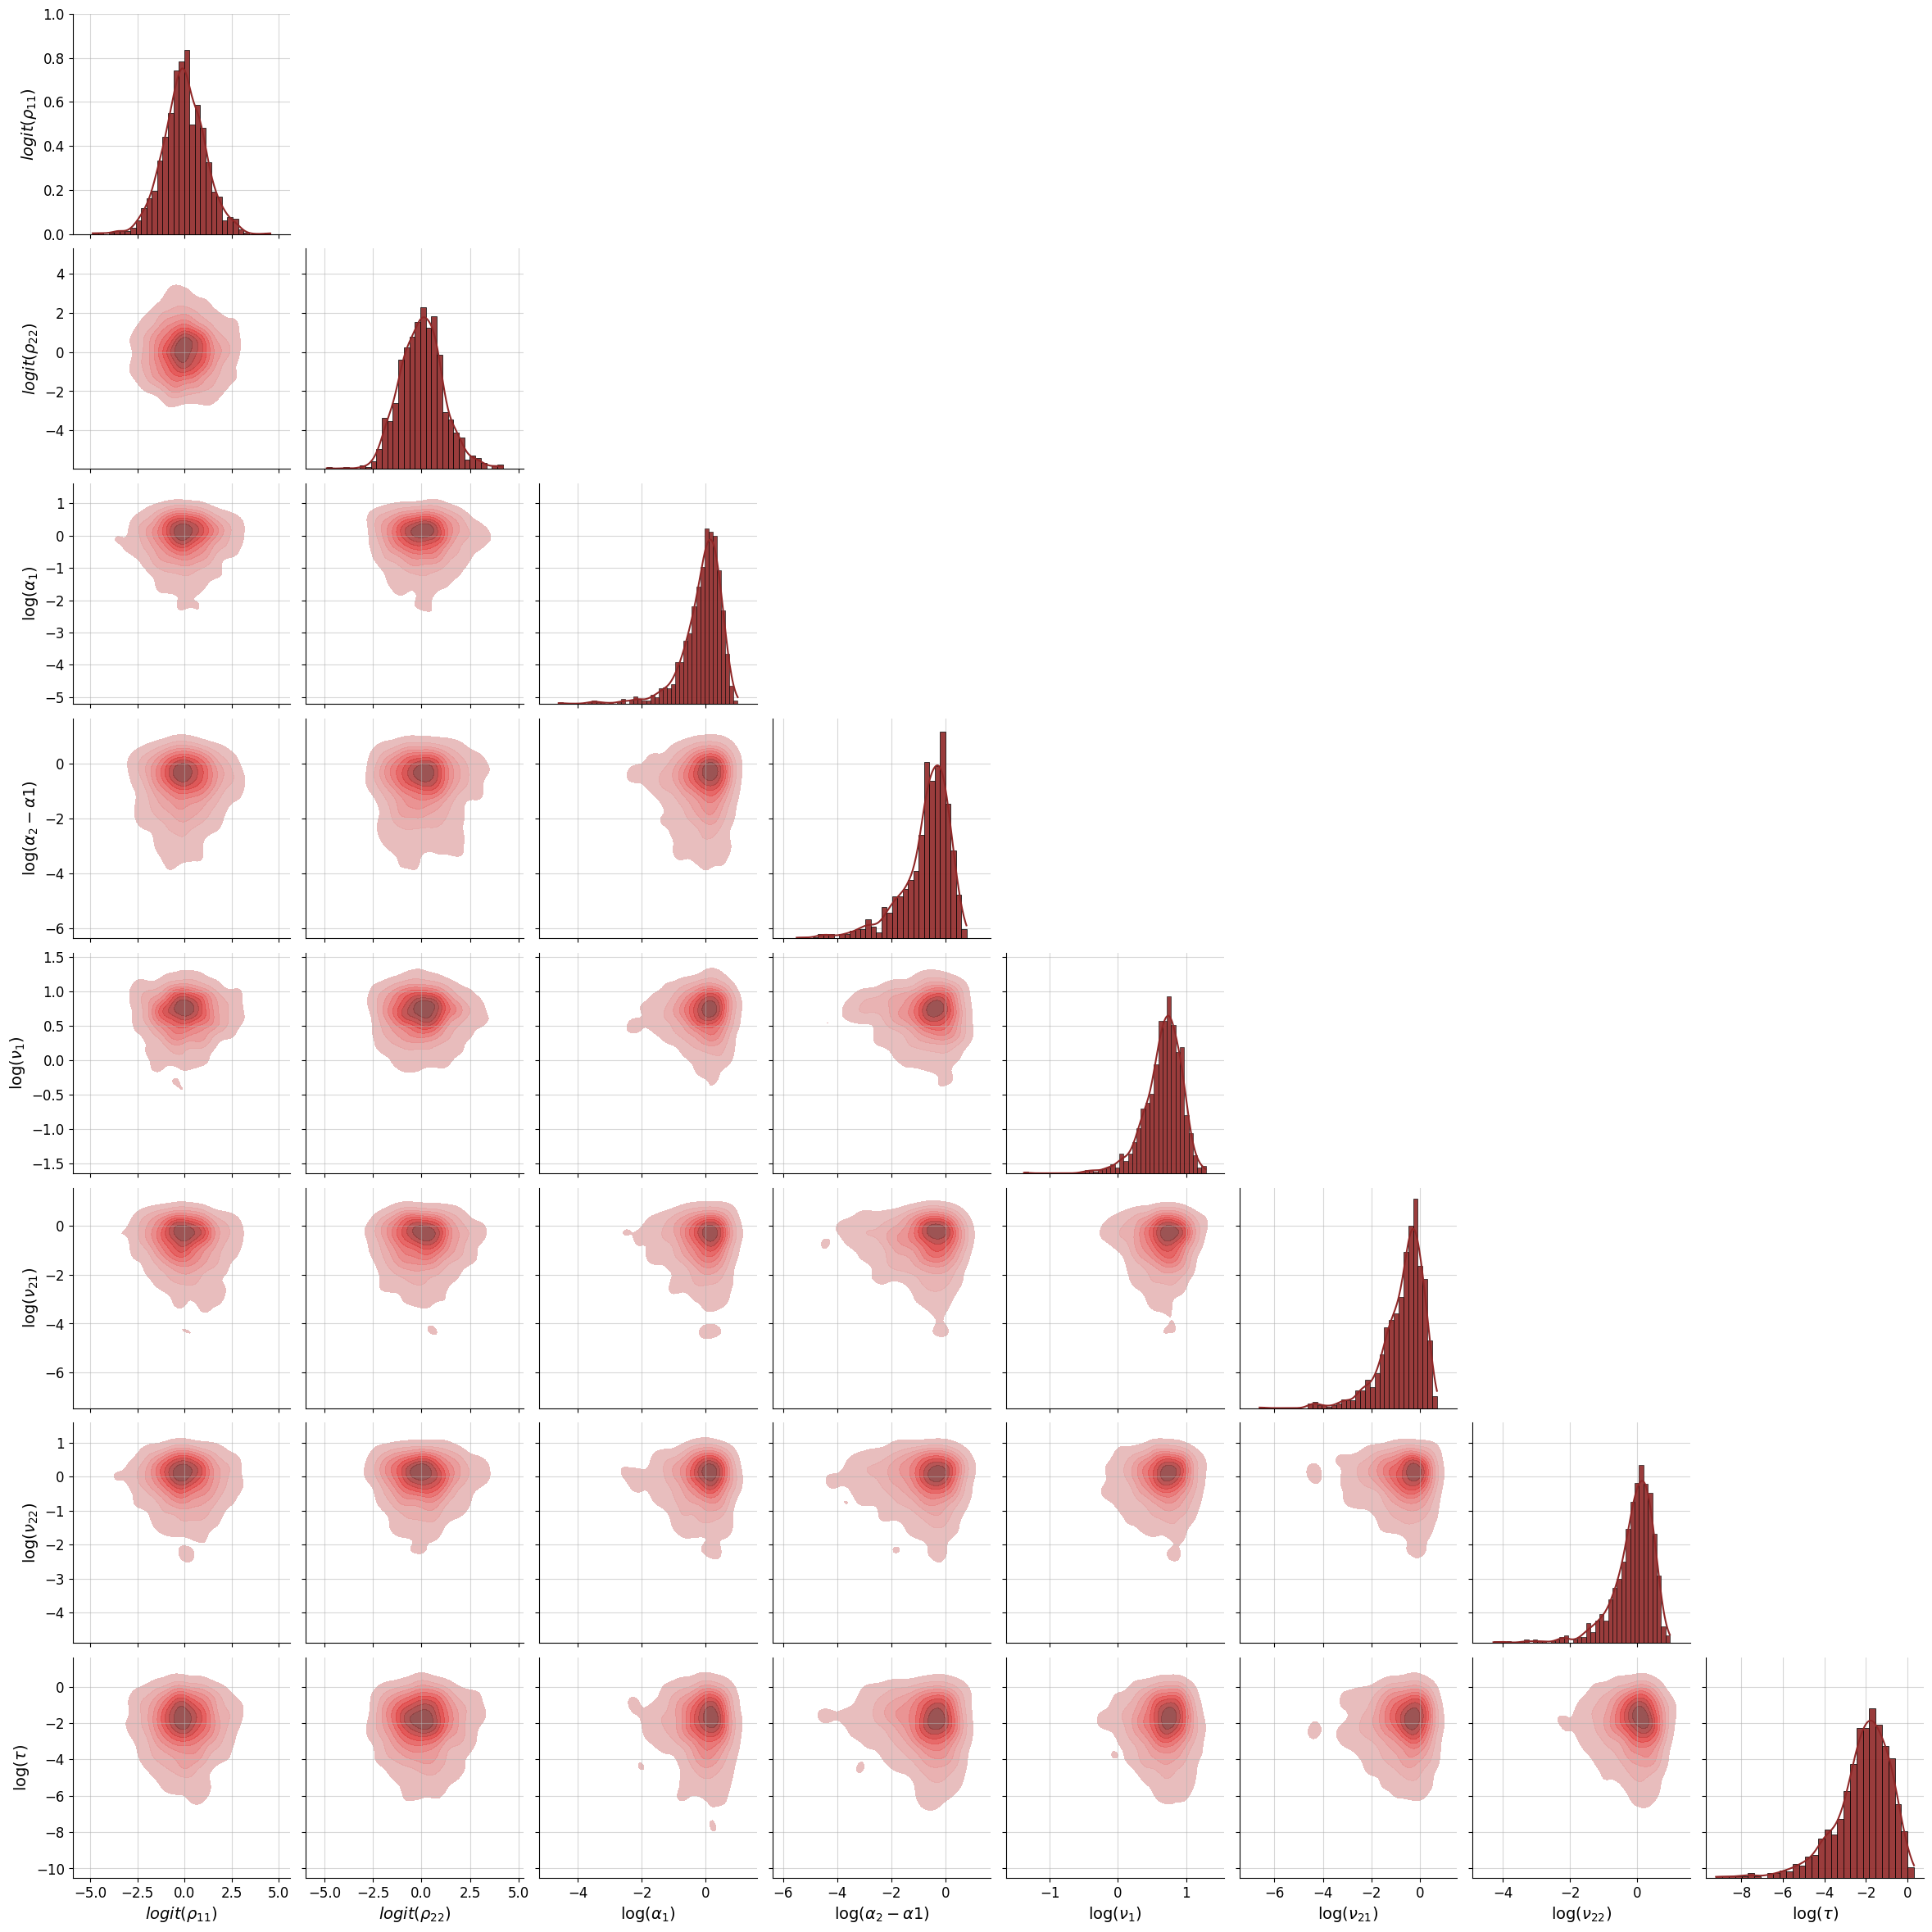

In [3]:
f=bf.diagnostics.plot_posterior_2d(df['prior_draws'], param_names=model.param_names)

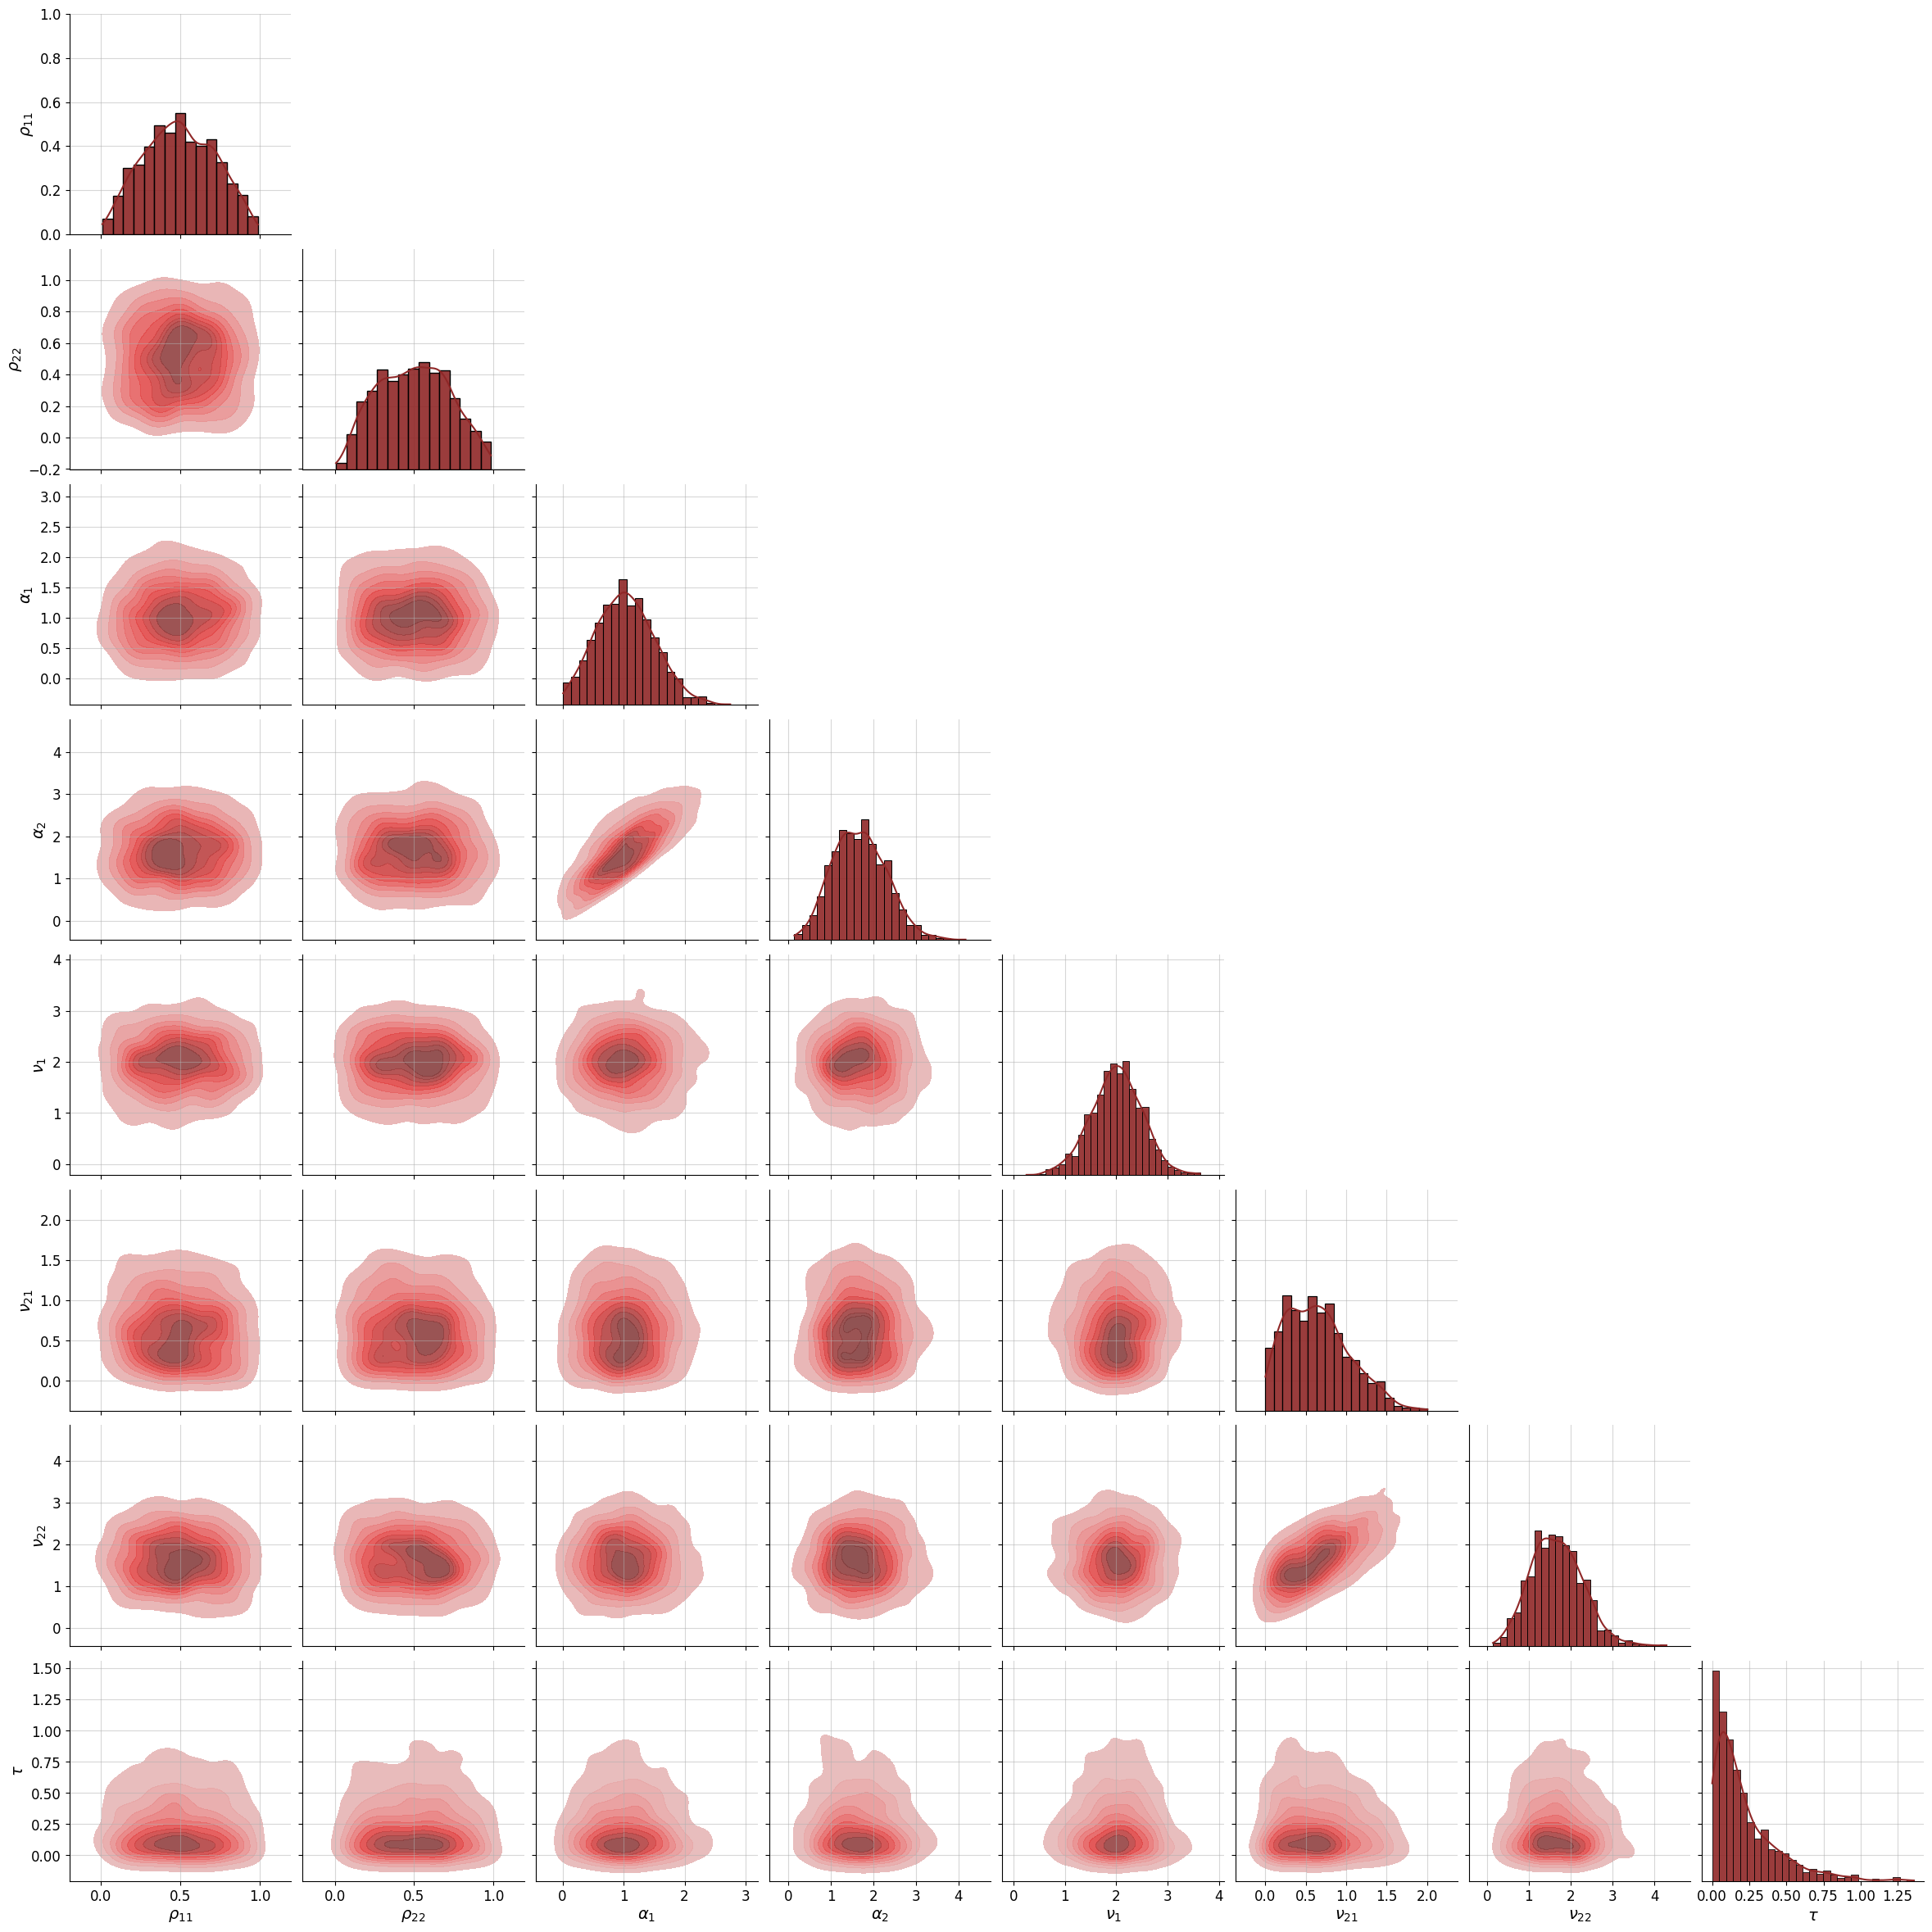

In [4]:
f=bf.diagnostics.plot_posterior_2d(constrain_parameters(df['prior_draws']), param_names=constrained_parameter_names)

In [5]:
configurator(df)["mixture_inputs"]["summary_conditions"].shape

TensorShape([1000, 200, 1, 3])

In [6]:
rts = np.array(configurator(df)["mixture_inputs"]["summary_conditions"][:,:,0,0])
rts

array([[1.1966964 , 1.2525766 , 1.6034905 , ..., 0.6016472 , 0.8900138 , 0.7233423 ],
       [1.5172426 , 3.4719856 , 0.7599981 , ..., 1.3425423 , 0.34263024, 0.30037338],
       [0.84029764, 0.53836614, 0.8048345 , ..., 0.93977135, 0.40795124, 1.2404441 ],
       ...,
       [1.0469075 , 1.2738771 , 0.89710003, ..., 0.8349953 , 1.0255071 , 1.3890709 ],
       [1.6233637 , 2.9591844 , 1.1052792 , ..., 1.4709165 , 1.7697593 , 1.1940383 ],
       [0.18679743, 1.4427446 , 0.24822852, ..., 0.18849196, 0.24234428, 0.37587738]], dtype=float32)

In [7]:
correct = np.array(configurator(df)["mixture_inputs"]["summary_conditions"][:,:,0,-1])
correct

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [8]:
guessing = np.array(configurator(df)["mixture_inputs"]["latents"][:,0,:,0])
guessing

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], dtype=float32)

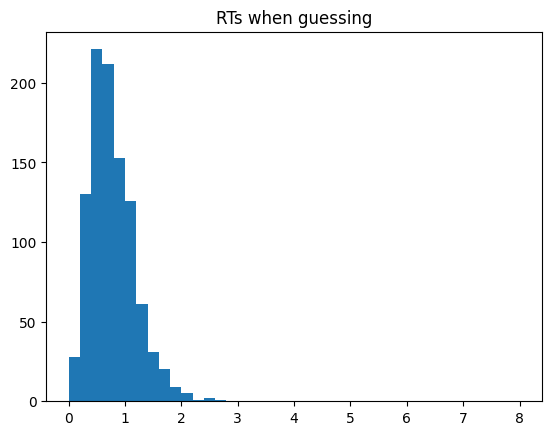

In [9]:
f=plt.hist(np.nanmean(np.where(guessing==1, rts, np.nan), axis=1), bins=np.linspace(0, 8, 41))
f=plt.title("RTs when guessing")

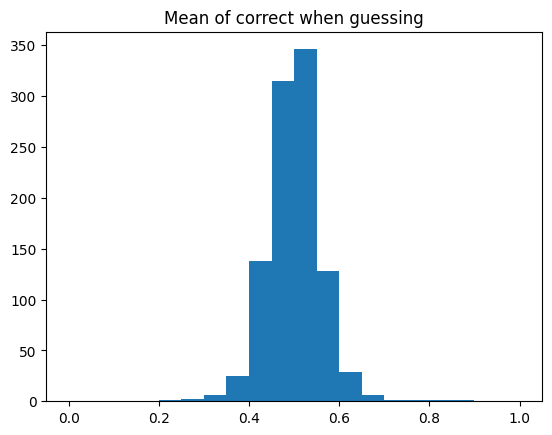

In [10]:
f=plt.hist(np.nanmean(np.where(guessing==1, correct, np.nan), axis=1), bins=np.linspace(0, 1, 21))
f=plt.title("Mean of correct when guessing")

<positron-console-cell-11>:4: RuntimeWarning: Mean of empty slice


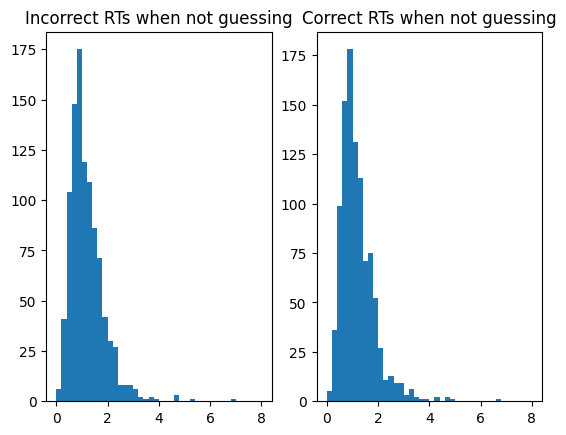

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=1)
axs = axs.flatten()

f=axs[0].hist(np.nanmean(np.where(np.all([guessing==0, correct==0], axis=0), rts, np.nan), axis=1), bins=np.linspace(0, 8, 41))
f=axs[0].set_title("Incorrect RTs when not guessing")

f=axs[1].hist(np.nanmean(np.where(np.all([guessing==0, correct==1], axis=0), rts, np.nan), axis=1), bins=np.linspace(0, 8, 41))
f=axs[1].set_title("Correct RTs when not guessing")


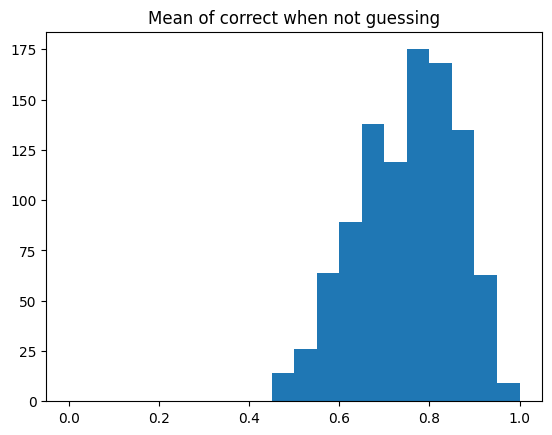

In [12]:
f=plt.hist(np.nanmean(np.where(guessing==0, correct, np.nan), axis=1), bins=np.linspace(0, 1, 21))
f=plt.title("Mean of correct when not guessing")

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


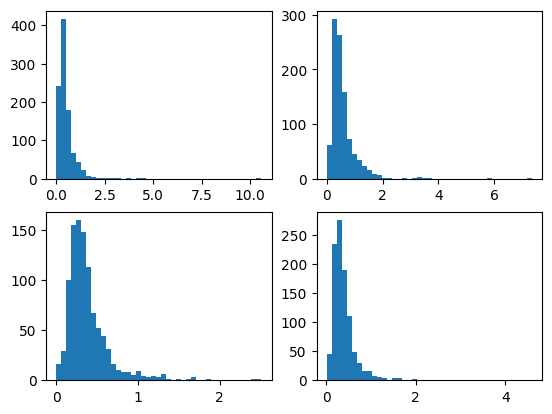

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2)

for g in range(2):
    for c in range(2):
        f=axs[g,c].hist(np.nanstd(np.where(np.all([guessing==g, correct==c], axis=0), rts, np.nan), axis=1), bins=41)
